# Decision Tree classifier - Small dataset

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

## Load Data

In [2]:
DATA_DIR = '../../data/raw/small/'

In [3]:
import pandas as pd

train_data = pd.read_csv(DATA_DIR + 'train.csv')

train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35187 entries, 0 to 35186
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 30.1 MB


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,1,1,2,2,0,2,0,1,0,0,...,1,3,7,596,1,0,0,0,0,1
1,2,1,1,1,0,1,0,0,0,0,...,1,4,5,298,1,0,0,0,0,1
2,2,1,0,3,0,0,0,0,0,0,...,1,2,0,299,0,1,0,0,0,1
3,4,1,0,5,0,0,0,0,0,0,...,1,2,1,13785,1,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,2,2,1,299,1,1,0,0,0,0


In [4]:
valid_data = pd.read_csv(DATA_DIR + 'valid.csv')

valid_data.info()
valid_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11729 entries, 0 to 11728
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 10.0 MB


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,24,0,5,2,0,7,0,6,0,0,...,2,2,0,292,1,0,0,0,0,1
1,3,0,0,1,0,0,0,0,0,0,...,1,4,0,226,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,3,5,3074,1,1,0,0,0,0
3,4,0,0,1,0,0,0,0,0,0,...,1,2,1,12085,0,0,0,0,0,1
4,2,0,0,1,0,0,0,0,0,0,...,1,3,1,3598,0,0,0,0,0,0


In [5]:
test_data = pd.read_csv(DATA_DIR + 'test.csv')

test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11729 entries, 0 to 11728
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 10.0 MB


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,1,0,0,3,0,0,0,0,0,0,...,1,2,1,3591,1,1,0,0,0,1
1,1,0,0,2,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,1,2,1,1947,1,0,0,0,0,0
3,3,1,0,7,0,1,1,0,0,0,...,1,2,1,21568,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,2,1,7192,0,1,0,0,0,0


## Get X and y data

In [6]:
TARGET_COL_NAME = 'phishing'

In [7]:
X_train = train_data.drop(TARGET_COL_NAME, axis=1)
y_train = train_data[TARGET_COL_NAME]

In [8]:
y_train.value_counts()

1    18388
0    16799
Name: phishing, dtype: int64

In [9]:
X_valid = valid_data.drop(TARGET_COL_NAME, axis=1)
y_valid = valid_data[TARGET_COL_NAME]

In [10]:
y_valid.value_counts()

1    6129
0    5600
Name: phishing, dtype: int64

In [11]:
X_test = test_data.drop(TARGET_COL_NAME, axis=1)
y_test = test_data[TARGET_COL_NAME]

In [12]:
y_test.value_counts()

1    6130
0    5599
Name: phishing, dtype: int64

## Hyperparameter tuning

In [13]:
RANDOM_STATE = 42

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

# Grid search over hyperparameters
criterions = ['entropy', 'gini']
max_depths = [5, 10, 20, 30, 40, 50, 60, 70, 80]

for criterion in criterions:
    for max_depth in max_depths:
        print('Criterion: {}, Max depth: {}'.format(criterion, max_depth))

        clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=RANDOM_STATE)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_valid)

        print('Validation data - Accuracy: {:.3f}, Balanced accuracy: {:.3f}, F1: {:.3f}, Precision: {:.3f}, Recall: {:.3f}'
              .format(accuracy_score(y_valid, y_pred),
                      balanced_accuracy_score(y_valid, y_pred),
                      f1_score(y_valid, y_pred),
                      precision_score(y_valid, y_pred),
                      recall_score(y_valid, y_pred)))
        print('-' * 20)

Criterion: entropy, Max depth: 5
Validation data - Accuracy: 0.896, Balanced accuracy: 0.895, F1: 0.902, Precision: 0.884, Recall: 0.922
--------------------
Criterion: entropy, Max depth: 10
Validation data - Accuracy: 0.927, Balanced accuracy: 0.926, F1: 0.931, Precision: 0.914, Recall: 0.948
--------------------
Criterion: entropy, Max depth: 20
Validation data - Accuracy: 0.932, Balanced accuracy: 0.931, F1: 0.935, Precision: 0.933, Recall: 0.937
--------------------
Criterion: entropy, Max depth: 30
Validation data - Accuracy: 0.931, Balanced accuracy: 0.931, F1: 0.934, Precision: 0.933, Recall: 0.936
--------------------
Criterion: entropy, Max depth: 40
Validation data - Accuracy: 0.931, Balanced accuracy: 0.931, F1: 0.934, Precision: 0.933, Recall: 0.936
--------------------
Criterion: entropy, Max depth: 50
Validation data - Accuracy: 0.931, Balanced accuracy: 0.931, F1: 0.934, Precision: 0.933, Recall: 0.936
--------------------
Criterion: entropy, Max depth: 60
Validation da

## Retrain the best model - training + validation dataset

In [23]:
best_criterion = 'gini'
best_max_depth = 30

In [24]:
X_train_and_valid = pd.concat([X_train, X_valid])
X_train_and_valid.shape

(46916, 111)

In [25]:
y_train_and_valid = pd.concat([y_train, y_valid])
y_train_and_valid.shape

(46916,)

In [26]:
best_clf = DecisionTreeClassifier(max_depth=best_max_depth, criterion=best_criterion, random_state=RANDOM_STATE)

best_clf.fit(X_train_and_valid, y_train_and_valid)

DecisionTreeClassifier(max_depth=30, random_state=42)

## Save trained model

In [27]:
from joblib import dump

dump(best_clf, "../../models/decision_tree_small_model.pkl") 

['../../models/decision_tree_small_model.pkl']

## Evaluate on test data

In [28]:
from sklearn.metrics import matthews_corrcoef, roc_curve

def fpr(y_true, y_pred, sample_weight=None):
    return roc_curve(y_true, y_pred, sample_weight=sample_weight)[0][1]

METRICS = [
    ('F1', f1_score),
    ('Accuracy', accuracy_score),
    ('Balanced accuracy', balanced_accuracy_score),
    ('MCC', matthews_corrcoef),
    ('Precision', precision_score),
    ('Recall', recall_score),
    ('FPR', fpr)
]

In [29]:
y_pred = best_clf.predict(X_test)

Metric values:

F1: 0.934
Accuracy: 0.931
Balanced accuracy: 0.931
MCC: 0.862
Precision: 0.936
Recall: 0.932
FPR: 0.070




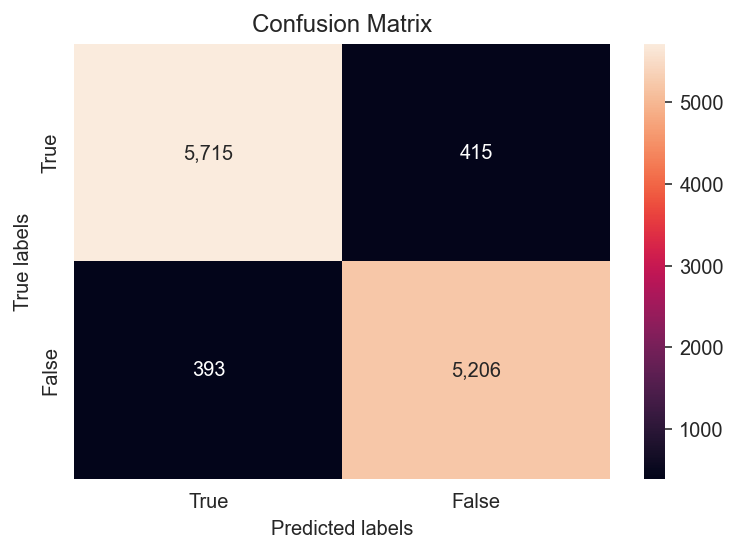

In [30]:
from bin.evaluation.evaluation import evaluate_classifier

evaluate_classifier(y_test, y_pred, y_pred, METRICS)

## Model analysis

In [31]:
from joblib import load

best_clf = load("../../models/decision_tree_small_model.pkl")

In [32]:
TOP_N_FEATURES = 3

In [33]:
feature_importances = list(zip(X_train_and_valid.columns, best_clf.feature_importances_))
feature_importances.sort(key=lambda x: x[1], reverse=True)

feature_importances

[('directory_length', 0.465640623428524),
 ('time_domain_activation', 0.15133575678142197),
 ('asn_ip', 0.050346544370842676),
 ('time_response', 0.04116929381151748),
 ('qty_tilde_directory', 0.039557090548428944),
 ('length_url', 0.03524745116898648),
 ('ttl_hostname', 0.03156881253305198),
 ('qty_dot_domain', 0.024023871976443963),
 ('qty_slash_url', 0.018357266096837514),
 ('time_domain_expiration', 0.017586483961076035),
 ('domain_length', 0.015021773656552414),
 ('qty_nameservers', 0.011975875770881727),
 ('qty_mx_servers', 0.01131603394696212),
 ('qty_ip_resolved', 0.011311043489879258),
 ('qty_dot_url', 0.01034203103885501),
 ('qty_vowels_domain', 0.009509531623052946),
 ('qty_hyphen_directory', 0.008034689556886679),
 ('qty_redirects', 0.006681308235726985),
 ('file_length', 0.004878580492456664),
 ('tls_ssl_certificate', 0.004352796994307313),
 ('qty_dollar_params', 0.004271747691642135),
 ('domain_spf', 0.0037587357355899267),
 ('qty_slash_directory', 0.002626597032743267),


In [34]:
feature_importances[:TOP_N_FEATURES]

[('directory_length', 0.465640623428524),
 ('time_domain_activation', 0.15133575678142197),
 ('asn_ip', 0.050346544370842676)]